In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)

In [3]:
data = california.frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='Longitude', ylabel='Latitude'>

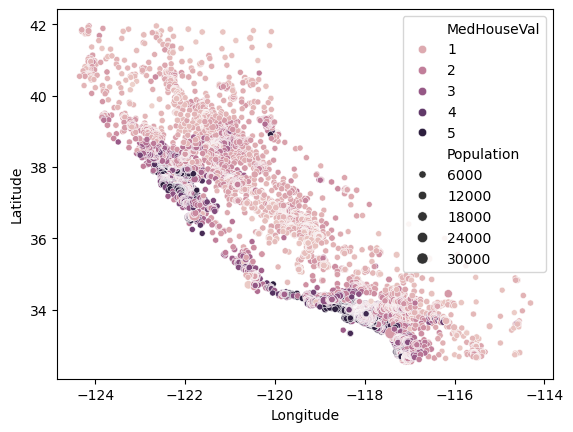

In [5]:
plt.Figure(figsize=(12,12))


sns.scatterplot(
    data=data,
    x='Longitude',
    y='Latitude',
    hue='MedHouseVal',
    size='Population'
)

In [6]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']),
    crs='EPSG:4326'
)
gdf


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,geometry
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,POINT (-122.23 37.88)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,POINT (-122.22 37.86)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,POINT (-122.24 37.85)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,POINT (-122.25 37.85)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,POINT (-122.25 37.85)
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,POINT (-121.09 39.48)
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,POINT (-121.21 39.49)
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,POINT (-121.22 39.43)
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,POINT (-121.32 39.43)


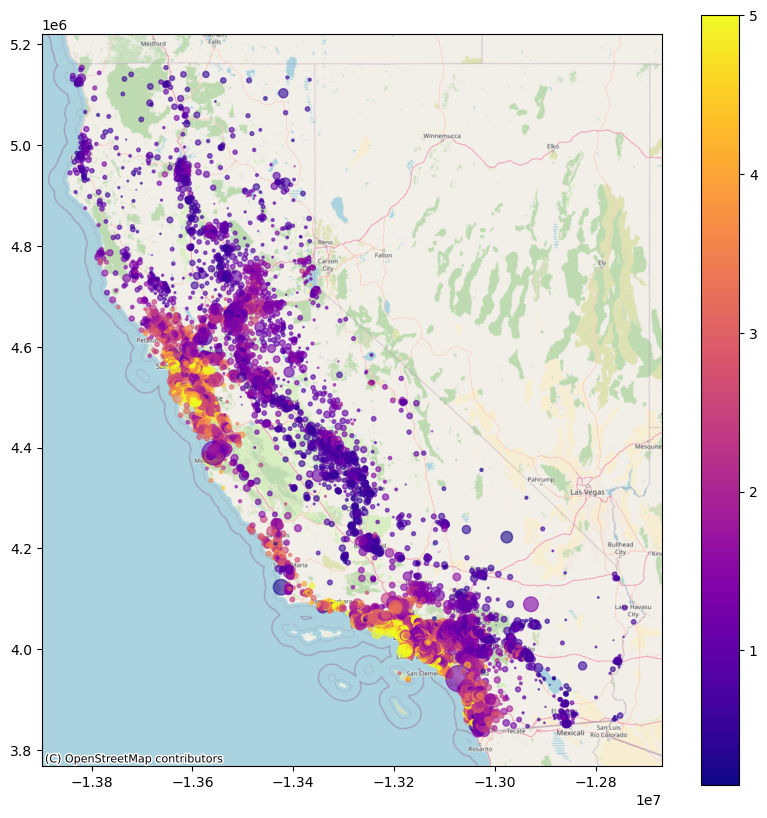

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
gdf = gdf.to_crs(epsg=3857)
gdf.plot(
    ax=ax,
    column='MedHouseVal',
    cmap='plasma',
    markersize=gdf['Population']/100,
    alpha=.60,
    legend=True
)
import contextily as ctx 
ctx.add_basemap(
    ax=ax,
    source= ctx.providers.OpenStreetMap.Mapnik
)

<Axes: >

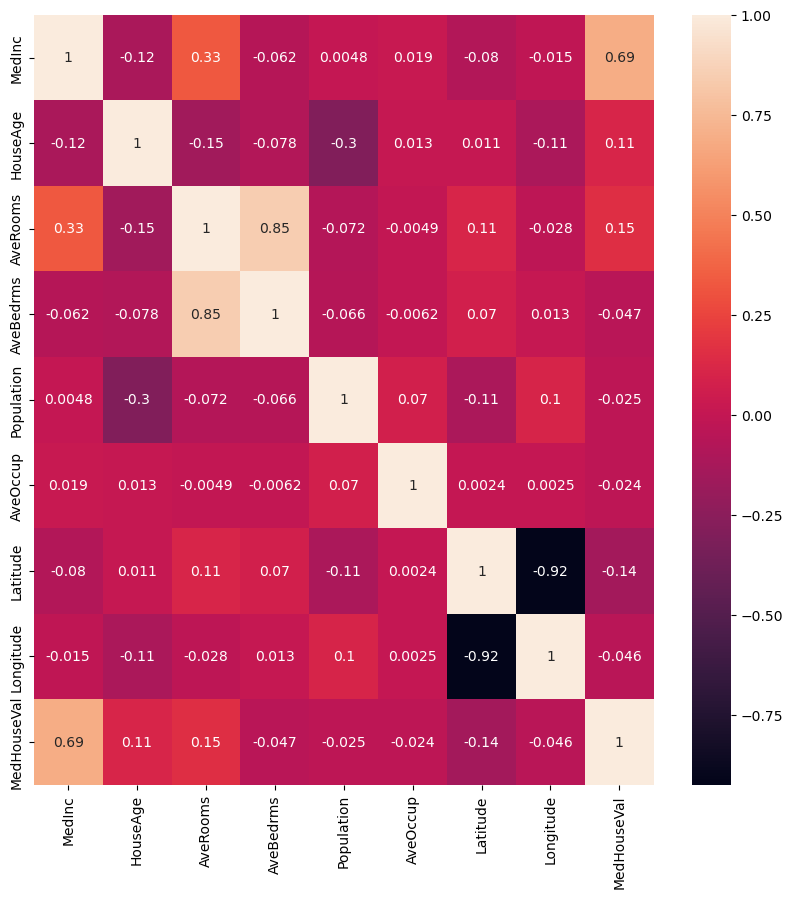

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

<Axes: xlabel='MedInc', ylabel='Count'>

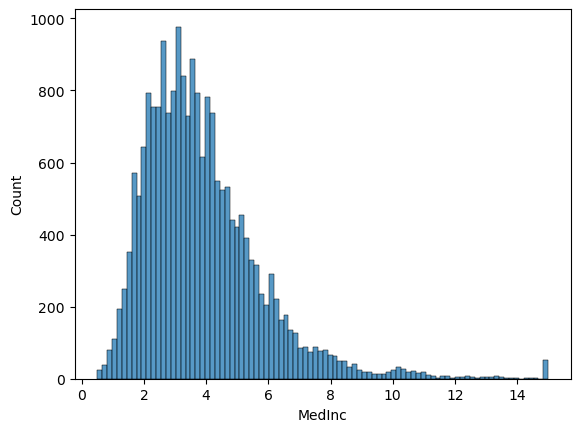

In [17]:
sns.histplot(data=data, x='MedInc')

<Axes: xlabel='MedHouseVal', ylabel='Count'>

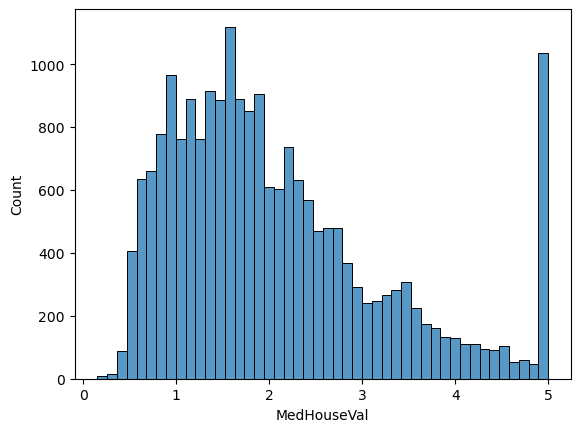

In [18]:
sns.histplot(data=data, x='MedHouseVal')

In [19]:
from sklearn.model_selection import train_test_split 

features = data.drop(columns=['MedHouseVal'])
target = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    random_state=101,
    train_size=.70

)

In [20]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [21]:
predictions = dtree.predict(X_test)
predictions

array([3.636  , 5.00001, 1.53   , ..., 0.43   , 1.775  , 2.823  ],
      shape=(6193,))

In [24]:
from sklearn.metrics import root_mean_squared_error 
root_mean_squared_error(y_test, predictions)

0.7444108327939909

In [25]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
root_mean_squared_error(y_test, predictions)

0.5283190328748378